In [1]:
from src.n_forest import *
%matplotlib widget

In [2]:
rho = 4.2     # fertility
f = 1         # aging_rate
a_1 = 1       # biotic_pump_young
a_2 = 0       # biotic_pump_old
h = 2         # mortality_old
dist = 50
beta_2 = 0.15
P_0 = 1.05
w_0 = 1
alpha_0 = -1.0
beta_1 = 0

arguments = (rho,f,a_1,h,a_2,dist,beta_2,P_0,w_0,alpha_0,beta_1)

Bifurcation diagram for variable $d_1$

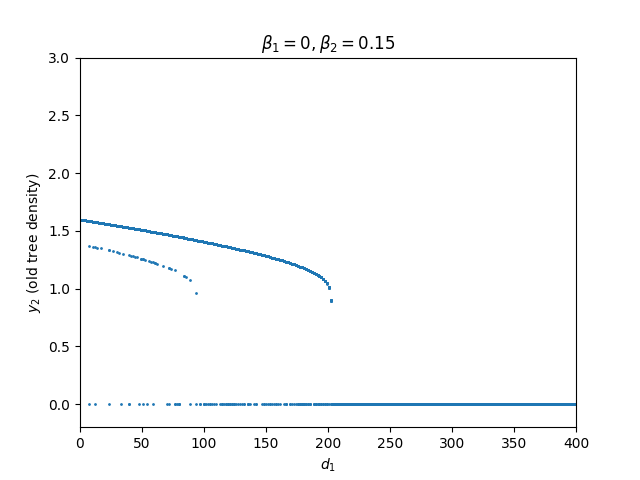

In [5]:
n = 500
r = np.linspace(1,800, n)

fig, ax = plt.subplots()

ds, y2s = [],[]
# x0, y0 = np.arange(0,5,5/n), np.arange(0,5,5/n)
for d in range(n):
    arguments = (rho,f,a_1,h,a_2, r[d], beta_2, P_0, w_0,alpha_0,beta_1)
    for i in range(10):
        # print(i)
        xs, ys = system_n_forests(np.random.uniform(0,5,2), np.random.uniform(0,5,2), arguments, timesteps=100, dt=0.1)
        y2s.append(ys[1][-1])
    ds.append(10*[r[d]]) 

ds=np.concatenate(ds)
# y2s=np.concatenate(y2s)

ax.plot(ds, y2s, 'o', ms=1)
ax.set_xlim(0,400)
ax.set_ylim(-0.2,3)
ax.set_xlabel(r'$d_1$')
ax.set_ylabel(r'$y_2$ (old tree density)')
ax.set_title(r"$\beta_1 = 0, \beta_2=0.15$")
plt.show()

Bifurcation for variable $\beta_2$, distance fixed at 50

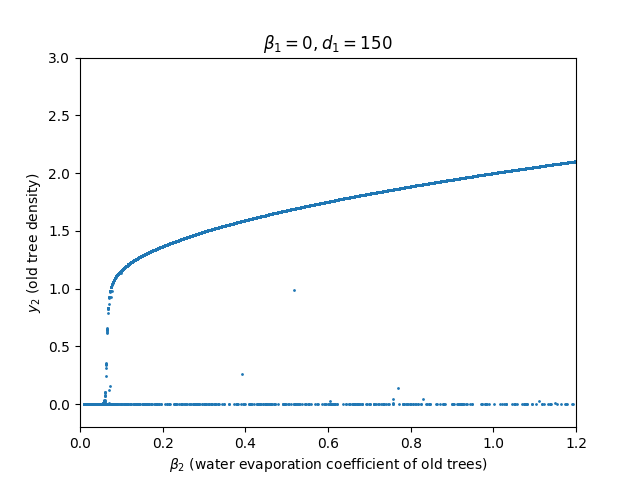

In [4]:
n = 500
beta_2 = np.linspace(0.01,1.2,n)

fig, ax = plt.subplots()

ds, y2s = [],[]
for b2 in range(n):
    arguments = (rho,f,a_1,h,a_2,150,beta_2[b2],P_0,w_0,alpha_0,beta_1)
    for _ in range(10):
        xs, ys = system_n_forests(np.random.uniform(0,5,2), np.random.uniform(0,5,2), arguments, timesteps=50, dt=0.1)
        y2s.append(ys[1][-1])
    ds.append(10*[beta_2[b2]])

ds=np.concatenate(ds)
# y2s=np.concatenate(y2s)

ax.plot(ds, y2s, 'o', ms=1)
ax.set_xlim(0,1.2)
ax.set_ylim(-0.2,3)
ax.set_xlabel(r'$\beta_2$ (water evaporation coefficient of old trees)')
ax.set_ylabel(r'$y_2$ (old tree density)')
ax.set_title(r"$\beta_1=0, d_1=150$")
plt.show()

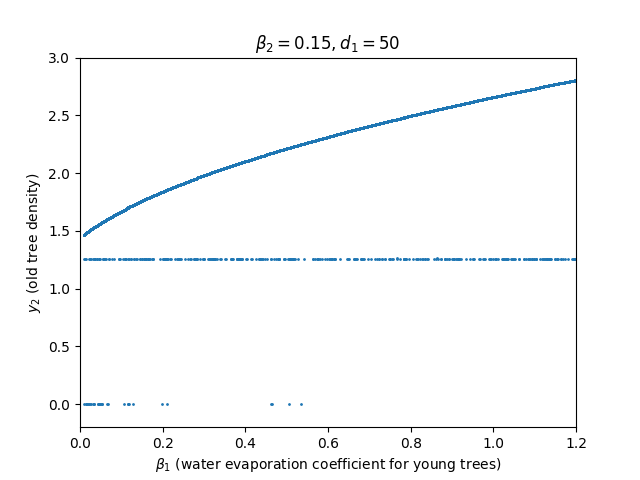

In [7]:
n = 500
beta_1 = np.linspace(0.01,1.2,n)
beta_2 = 0.1

fig, ax = plt.subplots()

ds, y2s = [],[]
for b1 in range(n):
    arguments = (rho,f,a_1,h,a_2,dist,beta_2,P_0,w_0,alpha_0,beta_1[b1])
    for _ in range(10):
        xs, ys = system_n_forests(np.random.uniform(0,5,2), np.random.uniform(0,5,2), arguments, timesteps=50, dt=0.1)
        y2s.append(ys[1][-1])
    ds.append(10*[beta_1[b1]])

ds=np.concatenate(ds)
# y2s=np.concatenate(y2s)

ax.plot(ds, y2s, 'o', ms=1)
ax.set_xlim(0,1.2)
ax.set_ylim(-0.2,3)
ax.set_xlabel(r'$\beta_1$ (water evaporation coefficient for young trees)')
ax.set_ylabel(r'$y_2$ (old tree density)')
ax.set_title(r"$\beta_2=0.15, d_1=50$")
plt.show()